In [1]:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
from scipy import optimize
from scipy.optimize import curve_fit
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel

def gerade(x,m,b):
    y=m*x+b
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

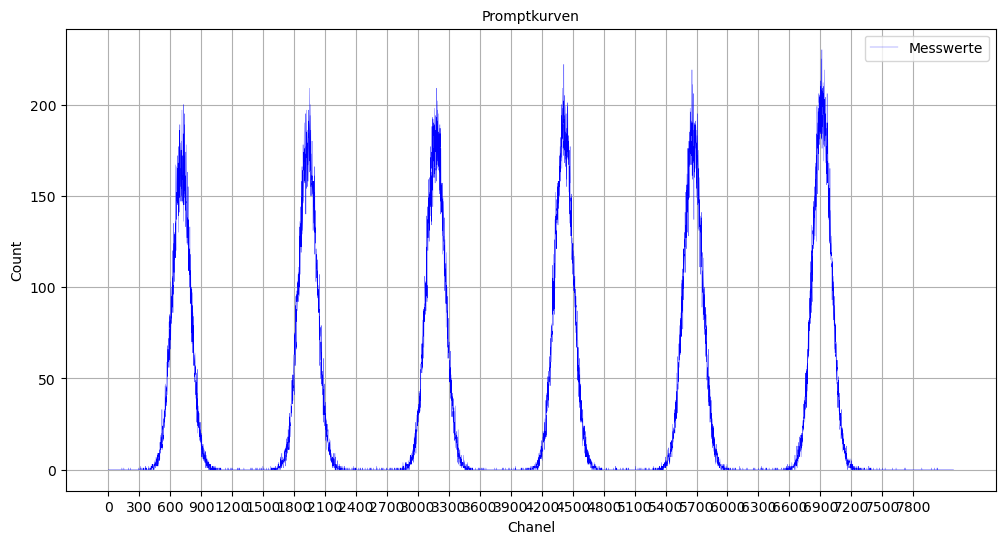

In [2]:
prompt=np.loadtxt("./A107/promtkurve.txt")
chanel=prompt[:,0]
count=prompt[:,1]

plt.figure(figsize=(12,6))
plt.title('Promptkurven',fontsize=10)
plt.plot(chanel,count,"b-",linewidth=.2,label="Messwerte",)
plt.xlabel('Chanel')
plt.ylabel('Count')
plt.xticks(np.arange(0,8000,300))
plt.grid()
plt.legend()
plt.show

[[Model]]
    (((((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(gaussian, prefix='g4_')) + Model(gaussian, prefix='g5_')) + Model(gaussian, prefix='g6_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 640
    # data points      = 8192
    # variables        = 18
    chi-square         = 242392.700
    reduced chi-square = 29.6541106
    Akaike info crit   = 27785.5896
    Bayesian info crit = 27911.7860
    R-squared          = 0.99014552
[[Variables]]
    g1_amplitude:  39376.1395 +/- 117.744074 (0.30%) (init = 160)
    g1_center:     1935.16427 +/- 0.30358172 (0.02%) (init = 720)
    g1_sigma:      87.9223365 +/- 0.30357865 (0.35%) (init = 100)
    g2_amplitude:  41995.4762 +/- 118.835571 (0.28%) (init = 180)
    g2_center:     4417.15266 +/- 0.29263647 (0.01%) (init = 1924)
    g2_sigma:      89.5599852 +/- 0.29263350 (0.33%) (init = 100)
    g3_amplitude:  36757.4627 +/- 117.602757 (0.32%) (in

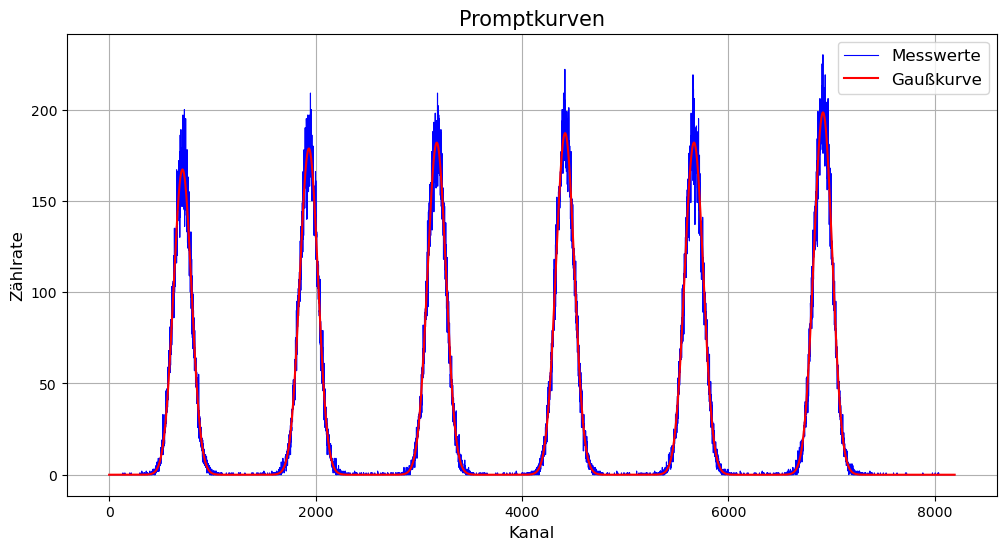

In [3]:
x1 = chanel
y1 = count

model = (GaussianModel(prefix='g1_')+
        GaussianModel(prefix='g2_')+
        GaussianModel(prefix='g3_')+
        GaussianModel(prefix='g4_')+
        GaussianModel(prefix='g5_')+
        GaussianModel(prefix='g6_'))

params = model.make_params(g1_amplitude=160,
                           g1_center=720,
                           g1_sigma=100,
                           g2_amplitude=180,
                           g2_center=1924,
                           g2_sigma=100,
                           g3_amplitude=190,
                           g3_center=3180,
                           g3_sigma=100,
                           g4_amplitude=180,
                           g4_center=4400,
                           g4_sigma=100,
                           g5_amplitude=180,
                           g5_center=5650,
                           g5_sigma=100,
                           g6_amplitude=180,
                           g6_center=6900,
                           g6_sigma=100)
params['g1_amplitude'].set(value=160,min=0.00)
params['g2_amplitude'].set(value=180,min=0.00)
params['g3_amplitude'].set(value=190,min=0.00)
params['g4_amplitude'].set(value=180,min=0.00)
params['g5_amplitude'].set(value=180,min=0.00)
params['g6_amplitude'].set(value=180,min=0.00)
params['g1_center'].set(value=720,min=0.00)
params['g2_center'].set(value=1924,min=0.00)
params['g3_center'].set(value=3180,min=0.00)
params['g4_center'].set(value=4400,min=0.00)
params['g5_center'].set(value=5650,min=0.00)
params['g6_center'].set(value=6900,min=0.00)

result = model.fit(y1, params, x=x1)
print(result.fit_report(min_correl=0.5))

lolo1=[]
lala1=[]
for name,param in result.params.items():
    if result.errorbars==True:
        lala1.append(param.stderr)
    else:
        lala1.append(0)
    lolo1.append(param.value)

plt.figure(figsize=(12,6))
plt.title('Promptkurven',fontsize=15)
plt.plot(chanel,count,"b-",linewidth=.8,label="Messwerte",)
plt.plot(chanel,result.best_fit,"r-",label="Gaußkurve",)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.savefig('Promptkurven.png')
plt.show

with open('fitparameter_promptkurven.txt','w') as f:
    for name in result.best_values:
        f.write(str(name)+'\t'+str(np.round(result.best_values[name],4))+'\n')
        
centers=[]
sigmas=[]


indices=[7,1,16,4,13,10]

for i in indices:
    centers.append(lolo1[i])
    sigmas.append(lolo1[i+1])

print(centers)
print(sigmas)

Durch die Anpassung bestimmte Parameter: [ 0.01288457 -0.99977634] +/- [2.32501777e-05 1.01239123e-01] nm


<function matplotlib.pyplot.show(close=None, block=None)>

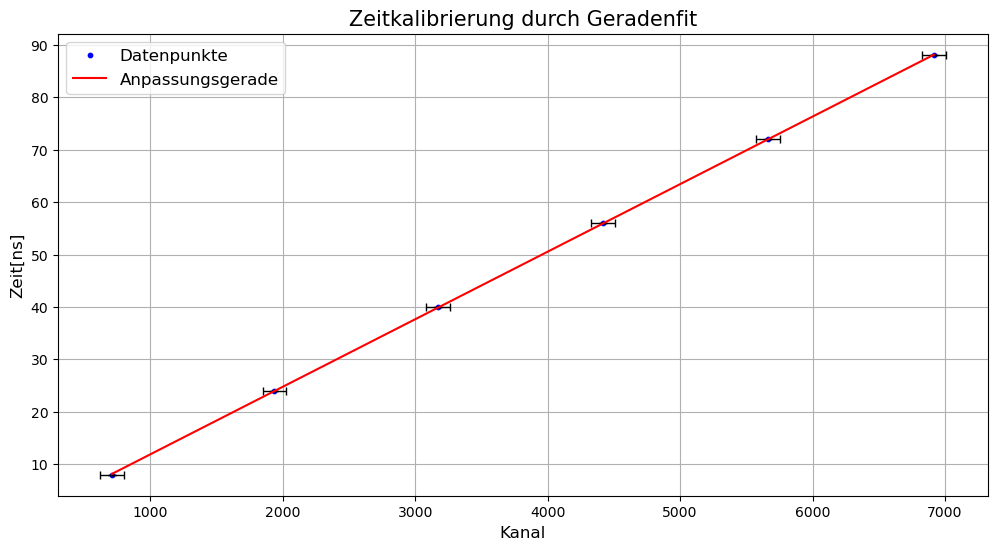

In [4]:
times=[8,24,40,56,72,88]
Er=[0,0,0,0,0,0]

s=[]
anpassungs_werte, co_var = curve_fit(gerade, centers,times)
perr= np.sqrt(np.diag(co_var))
print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
#Rfit    = funktion(U2[h], *anpassungs_werte)
Rfit=[]
for E in centers:
    Rfit.append(gerade(E, *anpassungs_werte))

plt.figure(figsize=(12,6))
plt.title('Zeitkalibrierung durch Geradenfit',fontsize=15)
plt.plot(centers,times,"b .",markersize=5,markeredgewidth=1.65,label="Datenpunkte",)
plt.errorbar(centers,times,Er,sigmas,'k.',capsize=3,elinewidth=1,markersize=0,)
plt.plot(centers,Rfit,'r-',label='Anpassungsgerade')
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zeit[ns]',fontsize=12)
plt.legend(fontsize=12)
plt.savefig('Zeitkalibrierung.png')
plt.grid()
plt.show

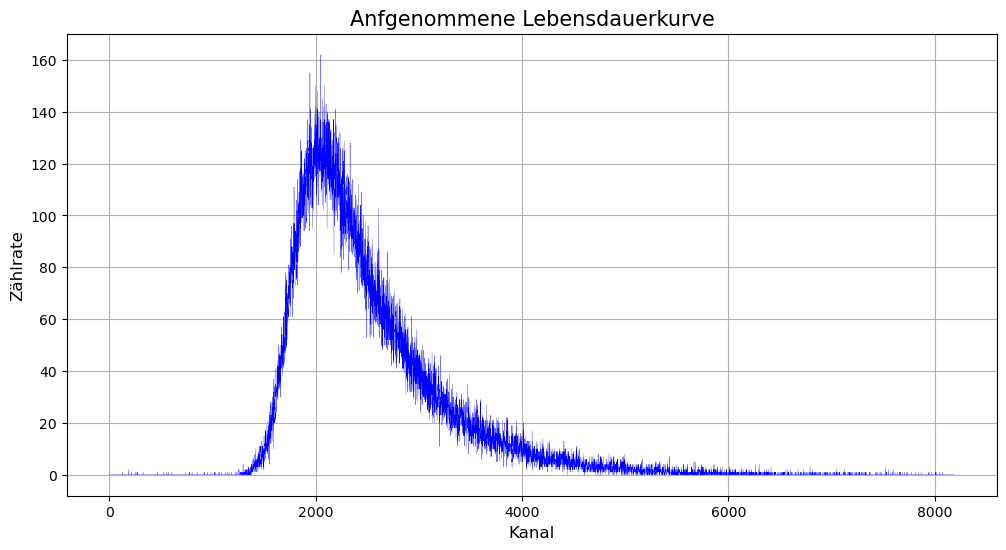

In [5]:
n1=np.loadtxt('./A107/Lebensdauer.txt')
x=n1[:,0]
y=n1[:,1]
plt.figure(figsize=(12,6))
plt.title('Anfgenommene Lebensdauerkurve',fontsize=15)
plt.plot(x,y,'b', linewidth=.2)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
#plt.xticks(np.arange(0, 8000, 300))
plt.grid()
plt.savefig('Lebensdauerkurve.png')
plt.show

def funk(x,A,t,mu,sigma):
    y1 = A/t*np.exp(-(x-16)/t)
    y2 = 1/(sigma*np.sqrt(np.pi*2))*np.exp(-0.5*(x-mu)**2/sigma**2)
    return scs.convolve(y1,y2, 'same')/ sum(y2)

Durch die Anpassung bestimmte Parameter: [303.28933985   9.33088351  74.82211497  -2.41787906] +/- [2.37219565 0.03407056 0.01109751 0.01309767] nm


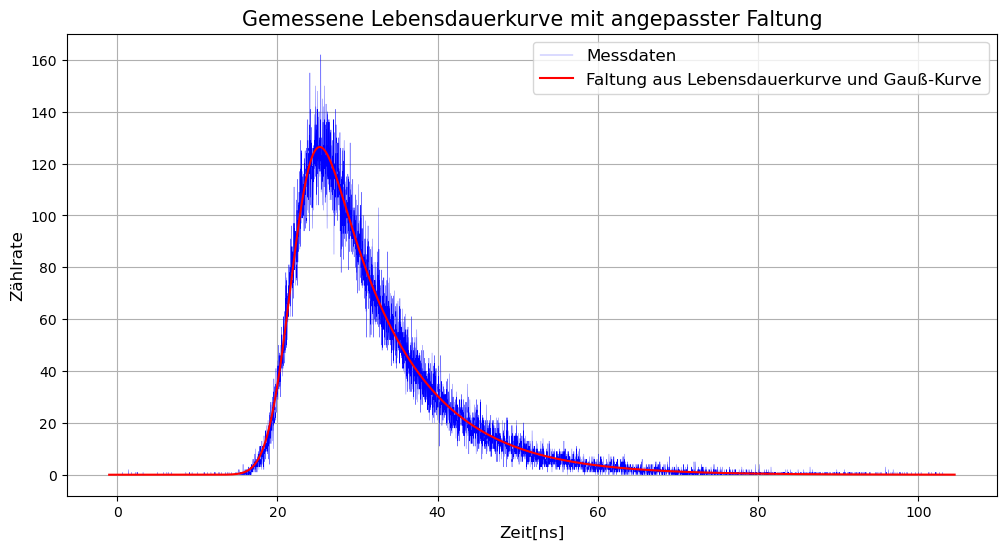

In [6]:
n1=np.loadtxt('./A107/Lebensdauer.txt')
x=0.01288457*n1[:,0]-0.99977631
y=n1[:,1]
s=[]
anpassungs_werte, co_var = curve_fit(funk,x,y)
perr= np.sqrt(np.diag(co_var))
print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
Rfit    = funk(x, *anpassungs_werte)
#Rfit=[]
#for E in x:
#    Rfit.append(funk(E, *anpassungs_werte))

plt.figure(figsize=(12,6))
#plt.errorbar(x,y,sigmas,Er,'k.',capsize=3,elinewidth=1,markersize=0,label='data')
#plt.plot(U2[h],,'r x',markersize=5)
plt.title('Gemessene Lebensdauerkurve mit angepasster Faltung',fontsize=15)
plt.plot(x,y,'b', linewidth=.2,label='Messdaten')
plt.plot(x,Rfit,'r',label='Faltung aus Lebensdauerkurve und Gauß-Kurve')
plt.xlabel('Zeit[ns]',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('Lebensdauerkurvefit.png')